In [141]:
import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from sklearn.model_selection import train_test_split    # To split the data (train and test)
from sklearn.linear_model import SGDRegressor           # To build the model (S.G.D)
from sklearn.preprocessing import StandardScaler        # To convert the predictor to the same scale(To scale down the data where mean =0 and std = 1) 
from sklearn.metrics import mean_squared_error          # To find the MSE (error)   To check the performance of your model 
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#loading  dataset

In [2]:
df=pd.read_csv(r"C:\Users\Asus\Downloads\bike_sales_india.csv")

In [9]:
df

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gujarat,67.72,Hero,Passion Pro,95040,2024,297,Electric,88.03,Third,2024,Not Available,Dealer,62025.20,Tier 1
9996,Delhi,19.94,Bajaj,CT 100,110369,2015,210,Hybrid,74.89,Third,2020,Active,Individual,80378.40,Tier 2
9997,West Bengal,79.95,Bajaj,Pulsar 150,313806,2018,267,Hybrid,76.78,First,2018,Expired,Dealer,199506.70,Tier 2
9998,Madhya Pradesh,16.07,Honda,Dio,204068,2018,856,Electric,97.75,Second,2021,Active,Individual,130978.70,Tier 3


In [145]:
df.columns

Index(['State', 'Avg Daily Distance (km)', 'Brand', 'Model', 'Price (INR)',
       'Year of Manufacture', 'Engine Capacity (cc)', 'Fuel Type',
       'Mileage (km/l)', 'Owner Type', 'Registration Year', 'Insurance Status',
       'Seller Type', 'Resale Price (INR)', 'City Tier'],
      dtype='object')

In [7]:
df.head(3)

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3


In [ ]:
#Eda

In [9]:
df.shape

(10000, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    10000 non-null  object 
 1   Avg Daily Distance (km)  10000 non-null  float64
 2   Brand                    10000 non-null  object 
 3   Model                    10000 non-null  object 
 4   Price (INR)              10000 non-null  int64  
 5   Year of Manufacture      10000 non-null  int64  
 6   Engine Capacity (cc)     10000 non-null  int64  
 7   Fuel Type                10000 non-null  object 
 8   Mileage (km/l)           10000 non-null  float64
 9   Owner Type               10000 non-null  object 
 10  Registration Year        10000 non-null  int64  
 11  Insurance Status         10000 non-null  object 
 12  Seller Type              10000 non-null  object 
 13  Resale Price (INR)       10000 non-null  float64
 14  City Tier              

In [147]:
null_cols=df.isnull().sum()
null_df=null_cols[null_cols>0].reset_index()

In [21]:
4419/220000*100

2.0086363636363633

In [15]:
null_df.rename(columns={'index':'Features',0:'Null_count'},inplace=True)
null_df #renames the columns of a DataFrame (null_df).


,Features,Null_count


In [17]:
round(4419/df.shape[0],2)

0.44

In [21]:
null_df['Null_PCT'] = null_df['Null_count'] / df.shape[0] * 100
null_df['Null_PCT'] = null_df['Null_PCT'].round(2).astype(str) + '%'


In [23]:
null_df['Null_PCT']=round(null_df.Null_count/df.shape[0]*100,2)

In [25]:
null_df['Null_PCT'] = null_df['Null_count'].apply(lambda x: f"{round(x / df.shape[0] * 100, 2)}%")


In [27]:
df.tail()

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
9995,Gujarat,67.72,Hero,Passion Pro,95040,2024,297,Electric,88.03,Third,2024,Not Available,Dealer,62025.20,Tier 1
9996,Delhi,19.94,Bajaj,CT 100,110369,2015,210,Hybrid,74.89,Third,2020,Active,Individual,80378.40,Tier 2
9997,West Bengal,79.95,Bajaj,Pulsar 150,313806,2018,267,Hybrid,76.78,First,2018,Expired,Dealer,199506.70,Tier 2
9998,Madhya Pradesh,16.07,Honda,Dio,204068,2018,856,Electric,97.75,Second,2021,Active,Individual,130978.70,Tier 3
9999,West Bengal,51.16,Royal Enfield,Classic 350,323583,2018,529,Petrol,41.68,Second,2018,Expired,Individual,142139.85,Tier 3


In [29]:
df.fillna #is used to fill missing values (NaNs) in a DataFrame or Series.

<bound method NDFrame.fillna of                State  Avg Daily Distance (km)          Brand        Model  \
0          Karnataka                    68.84  Royal Enfield   Hunter 350   
1          Rajasthan                    23.80          Bajaj  Dominar 400   
2     Madhya Pradesh                    27.67            KTM     125 Duke   
3          Karnataka                    62.85       Kawasaki    Ninja 300   
4     Madhya Pradesh                    10.62         Yamaha        FZ V3   
...              ...                      ...            ...          ...   
9995         Gujarat                    67.72           Hero  Passion Pro   
9996           Delhi                    19.94          Bajaj       CT 100   
9997     West Bengal                    79.95          Bajaj   Pulsar 150   
9998  Madhya Pradesh                    16.07          Honda          Dio   
9999     West Bengal                    51.16  Royal Enfield  Classic 350   

      Price (INR)  Year of Manufacture  Eng

In [149]:
df.isnull().sum() #checking the null values

State                      0
Avg Daily Distance (km)    0
Brand                      0
Model                      0
Price (INR)                0
Year of Manufacture        0
Engine Capacity (cc)       0
Fuel Type                  0
Mileage (km/l)             0
Owner Type                 0
Registration Year          0
Insurance Status           0
Seller Type                0
Resale Price (INR)         0
City Tier                  0
dtype: int64

In [151]:
df[df.duplicated()].shape

(0, 15)

In [153]:
df.drop_duplicates(keep='first',ignore_index=True,inplace=True)

In [155]:
df[df.duplicated()]

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier


In [43]:
df

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gujarat,67.72,Hero,Passion Pro,95040,2024,297,Electric,88.03,Third,2024,Not Available,Dealer,62025.20,Tier 1
9996,Delhi,19.94,Bajaj,CT 100,110369,2015,210,Hybrid,74.89,Third,2020,Active,Individual,80378.40,Tier 2
9997,West Bengal,79.95,Bajaj,Pulsar 150,313806,2018,267,Hybrid,76.78,First,2018,Expired,Dealer,199506.70,Tier 2
9998,Madhya Pradesh,16.07,Honda,Dio,204068,2018,856,Electric,97.75,Second,2021,Active,Individual,130978.70,Tier 3


In [39]:
df.describe().columns

Index(['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture',
       'Engine Capacity (cc)', 'Mileage (km/l)', 'Registration Year',
       'Resale Price (INR)'],
      dtype='object')

In [157]:
df[['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture',
       'Engine Capacity (cc)', 'Mileage (km/l)', 'Registration Year',
       'Resale Price (INR)']].corr() # checking the corrleation

,Avg Daily Distance (km),Price (INR),Year of Manufacture,Engine Capacity (cc),Mileage (km/l),Registration Year,Resale Price (INR)
Avg Daily Distance (km),1.000000,0.012124,0.019411,-0.005903,0.009724,0.013709,0.003521
Price (INR),0.012124,1.000000,-0.002630,0.000894,0.000498,-0.008325,0.919792
Year of Manufacture,0.019411,-0.002630,1.000000,0.011966,0.009933,0.718719,-0.005829
Engine Capacity (cc),-0.005903,0.000894,0.011966,1.000000,-0.006772,0.001924,0.002967
Mileage (km/l),0.009724,0.000498,0.009933,-0.006772,1.000000,0.007334,0.008279
Registration Year,0.013709,-0.008325,0.718719,0.001924,0.007334,1.000000,-0.007215
Resale Price (INR),0.003521,0.919792,-0.005829,0.002967,0.008279,-0.007215,1.000000


<Axes: >

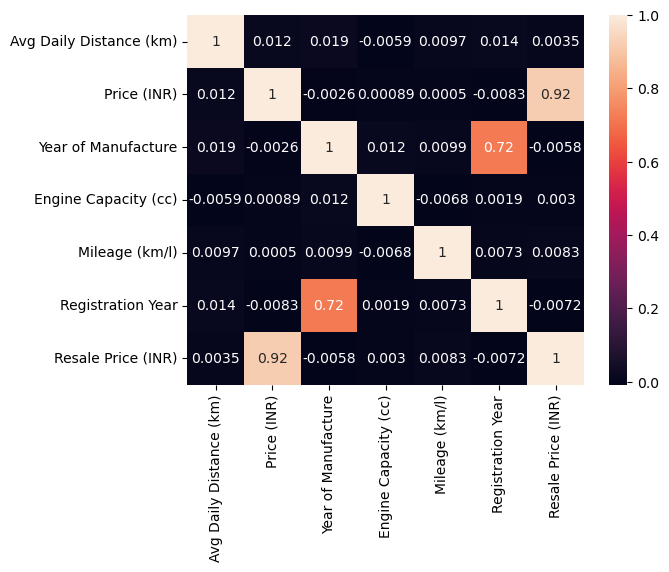

In [159]:
sns.heatmap(df[['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture',
       'Engine Capacity (cc)', 'Mileage (km/l)', 'Registration Year',
       'Resale Price (INR)']].corr(),annot=True)

In [161]:
df.head(3)

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,387.213352,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,258.766884,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,376.194949,Tier 3


In [163]:
df.drop(['Brand', 'Owner Type'],axis=1)

,State,Avg Daily Distance (km),Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Hunter 350,252816,2021,672,Electric,78.41,2024,Active,Individual,387.213352,Tier 3
1,Rajasthan,23.80,Dominar 400,131100,2020,769,Hybrid,89.98,2023,Active,Individual,258.766884,Tier 3
2,Madhya Pradesh,27.67,125 Duke,201016,2020,216,Hybrid,71.46,2023,Active,Dealer,376.194949,Tier 3
3,Karnataka,62.85,Ninja 300,132482,2021,556,Petrol,51.73,2021,Active,Dealer,236.764060,Tier 1
4,Madhya Pradesh,10.62,FZ V3,231796,2019,298,Petrol,54.72,2019,Not Available,Individual,364.058182,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gujarat,67.72,Passion Pro,95040,2024,297,Electric,88.03,2024,Not Available,Dealer,249.048590,Tier 1
9996,Delhi,19.94,CT 100,110369,2015,210,Hybrid,74.89,2020,Active,Individual,283.510846,Tier 2
9997,West Bengal,79.95,Pulsar 150,313806,2018,267,Hybrid,76.78,2018,Expired,Dealer,446.661729,Tier 2
9998,Madhya Pradesh,16.07,Dio,204068,2018,856,Electric,97.75,2021,Active,Individual,361.909795,Tier 3


In [49]:
df

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
0,Karnataka,68.84,Royal Enfield,Hunter 350,252816,2021,672,Electric,78.41,Second,2024,Active,Individual,149934.18,Tier 3
1,Rajasthan,23.80,Bajaj,Dominar 400,131100,2020,769,Hybrid,89.98,Third,2023,Active,Individual,66960.30,Tier 3
2,Madhya Pradesh,27.67,KTM,125 Duke,201016,2020,216,Hybrid,71.46,Second,2023,Active,Dealer,141522.64,Tier 3
3,Karnataka,62.85,Kawasaki,Ninja 300,132482,2021,556,Petrol,51.73,Third,2021,Active,Dealer,56057.22,Tier 1
4,Madhya Pradesh,10.62,Yamaha,FZ V3,231796,2019,298,Petrol,54.72,Third,2019,Not Available,Individual,132538.36,Tier 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Gujarat,67.72,Hero,Passion Pro,95040,2024,297,Electric,88.03,Third,2024,Not Available,Dealer,62025.20,Tier 1
9996,Delhi,19.94,Bajaj,CT 100,110369,2015,210,Hybrid,74.89,Third,2020,Active,Individual,80378.40,Tier 2
9997,West Bengal,79.95,Bajaj,Pulsar 150,313806,2018,267,Hybrid,76.78,First,2018,Expired,Dealer,199506.70,Tier 2
9998,Madhya Pradesh,16.07,Honda,Dio,204068,2018,856,Electric,97.75,Second,2021,Active,Individual,130978.70,Tier 3


<Axes: xlabel='Resale Price (INR)'>

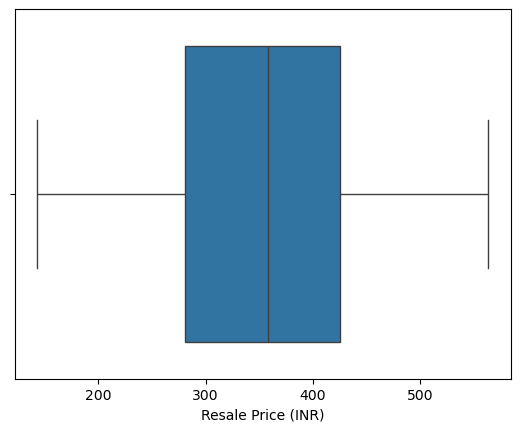

In [165]:
sns.boxplot(x=df['Resale Price (INR)'])

(array([ 313.,  848., 1007., 1252., 1404., 1566., 1504., 1141.,  693.,
         272.]),
 array([143.29016016, 185.29075004, 227.29133992, 269.29192979,
        311.29251967, 353.29310954, 395.29369942, 437.2942893 ,
        479.29487917, 521.29546905, 563.29605892]),
 <BarContainer object of 10 artists>)

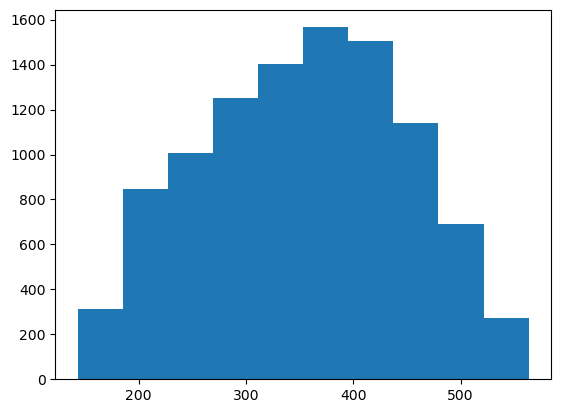

In [167]:
plt.hist(df['Resale Price (INR)'])

<Axes: xlabel='Resale Price (INR)', ylabel='Density'>

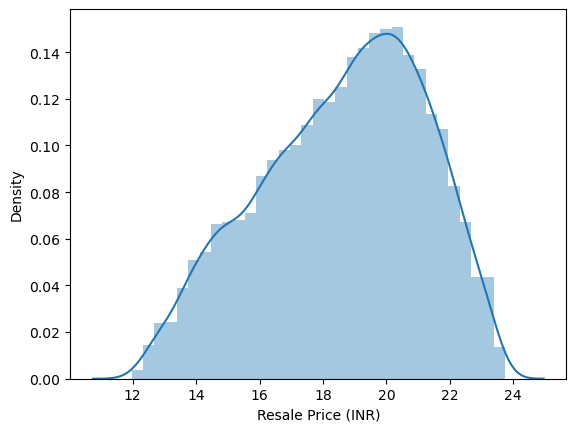

In [169]:
sns.distplot(np.sqrt(df['Resale Price (INR)']))

In [61]:
df['Resale Price (INR)'] =np.sqrt(df['Resale Price (INR)'])

In [63]:
cat_cols=df.describe(include='object').columns.to_list()
print(cat_cols)

['State', 'Brand', 'Model', 'Fuel Type', 'Owner Type', 'Insurance Status', 'Seller Type', 'City Tier']


In [65]:
cat_cols + ['color']

['State',
 'Brand',
 'Model',
 'Fuel Type',
 'Owner Type',
 'Insurance Status',
 'Seller Type',
 'City Tier',
 'color']

In [171]:
for i in cat_cols: #understand categorical variables and their impact on the target variable (Resale Price (INR)).
    print(df[i].value_counts())
    print(df[i].unique())
    print(df[i].nunique())
    print(df.groupby(i)['Resale Price (INR)'].mean())
    print('---',30)

State
Punjab            1051
Maharashtra       1030
Rajasthan         1017
Uttar Pradesh     1003
Gujarat           1002
Tamil Nadu         994
Karnataka          982
Delhi              977
Madhya Pradesh     973
West Bengal        971
Name: count, dtype: int64
['Karnataka' 'Rajasthan' 'Madhya Pradesh' 'Maharashtra' 'Tamil Nadu'
 'Punjab' 'Gujarat' 'Uttar Pradesh' 'Delhi' 'West Bengal']
10
State
Delhi             355.445883
Gujarat           358.115269
Karnataka         354.645600
Madhya Pradesh    350.864283
Maharashtra       349.678091
Punjab            354.778091
Rajasthan         349.834718
Tamil Nadu        352.638509
Uttar Pradesh     356.680367
West Bengal       352.270800
Name: Resale Price (INR), dtype: float64
--- 30
Brand
Kawasaki         1291
Yamaha           1283
KTM              1272
Royal Enfield    1253
Hero             1239
TVS              1234
Honda            1221
Bajaj            1207
Name: count, dtype: int64
['Royal Enfield' 'Bajaj' 'KTM' 'Kawasaki' 'Yamaha' 'Her

In [69]:
df1=df.copy(deep=True)

In [71]:
df_e= pd.get_dummies(df,drop_first=True).astype('int') #This line of code is used for encoding categorical variables in a dataset

In [73]:
df_e.shape

(10000, 72)

In [ ]:
#model bulding

In [173]:
from sklearn.model_selection import train_test_split

In [175]:
from sklearn.preprocessing import StandardScaler

In [79]:
X=df_e.drop('Resale Price (INR)',axis=1)
y=df_e['Resale Price (INR)']

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [179]:
from sklearn.linear_model import LinearRegression












In [181]:
lr=LinearRegression()

In [183]:
lr.fit(X_train,y_train)

LinearRegression()

In [185]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [187]:
from sklearn.metrics import r2_score

In [189]:
r2_score(y_train,y_train_pred)

0.8455456005589729

In [191]:
r2_score(y_test,y_test_pred)

0.8522693429959862

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
model2=DecisionTreeRegressor()

In [101]:
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [103]:
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

In [105]:
r2_score(y_train,y_train_pred)

1.0

In [107]:
r2_score(y_test,y_test_pred)

0.7271592703568044

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [115]:
model3=RandomForestRegressor(n_estimators=500,max_depth=3)

In [117]:
model3.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=500)

In [125]:
y_train_pred=model3.predict(X_train)

In [127]:
y_test_pred=model3.predict(X_test)

In [129]:
r2_score(y_train,y_train_pred)

0.8524271277956084

In [131]:
r2_score(y_test,y_test_pred)

0.8616298679478801

In [125]:
df.isnull().sum()

State                      0
Avg Daily Distance (km)    0
Brand                      0
Model                      0
Price (INR)                0
Year of Manufacture        0
Engine Capacity (cc)       0
Fuel Type                  0
Mileage (km/l)             0
Owner Type                 0
Registration Year          0
Insurance Status           0
Seller Type                0
Resale Price (INR)         0
City Tier                  0
dtype: int64

In [127]:
df[df.duplicated]

,State,Avg Daily Distance (km),Brand,Model,Price (INR),Year of Manufacture,Engine Capacity (cc),Fuel Type,Mileage (km/l),Owner Type,Registration Year,Insurance Status,Seller Type,Resale Price (INR),City Tier
